<h1><center> DS 300 Data Mining - PE 3 Classification </center></h1>

## Classification Exercises

#### Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

![image](https://www.quotemaster.org/images/92/92558cf82706fcb46a06dded0c687a7b.jpg)

#### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Content
The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as db

%matplotlib inline

## Q1: Let's first create SQLite engine and read the 'data' Table into a variable named as 'data'. Data can be found at [link](https://raw.githubusercontent.com/BlueJayADAL/DS300/master/datasets/lec13_diabetes.db), and you should upload it to the same directory of this notebook.

In [2]:
# Need to place the database file in the same directory of the notebook





## Q2: Use a query to read all Table data into an array, and then convert the array into a DataFrame named `df`. 

In [4]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


## Q3: Show DataFrame information, and check for missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Q4: EDA

## Check the y labels to see if they are severely imbalanced.

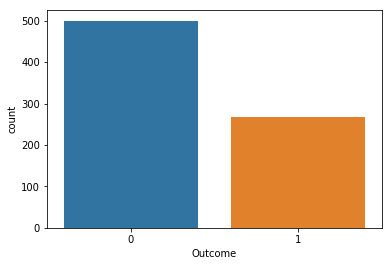

## Visualize the scatter plot among all feature columns

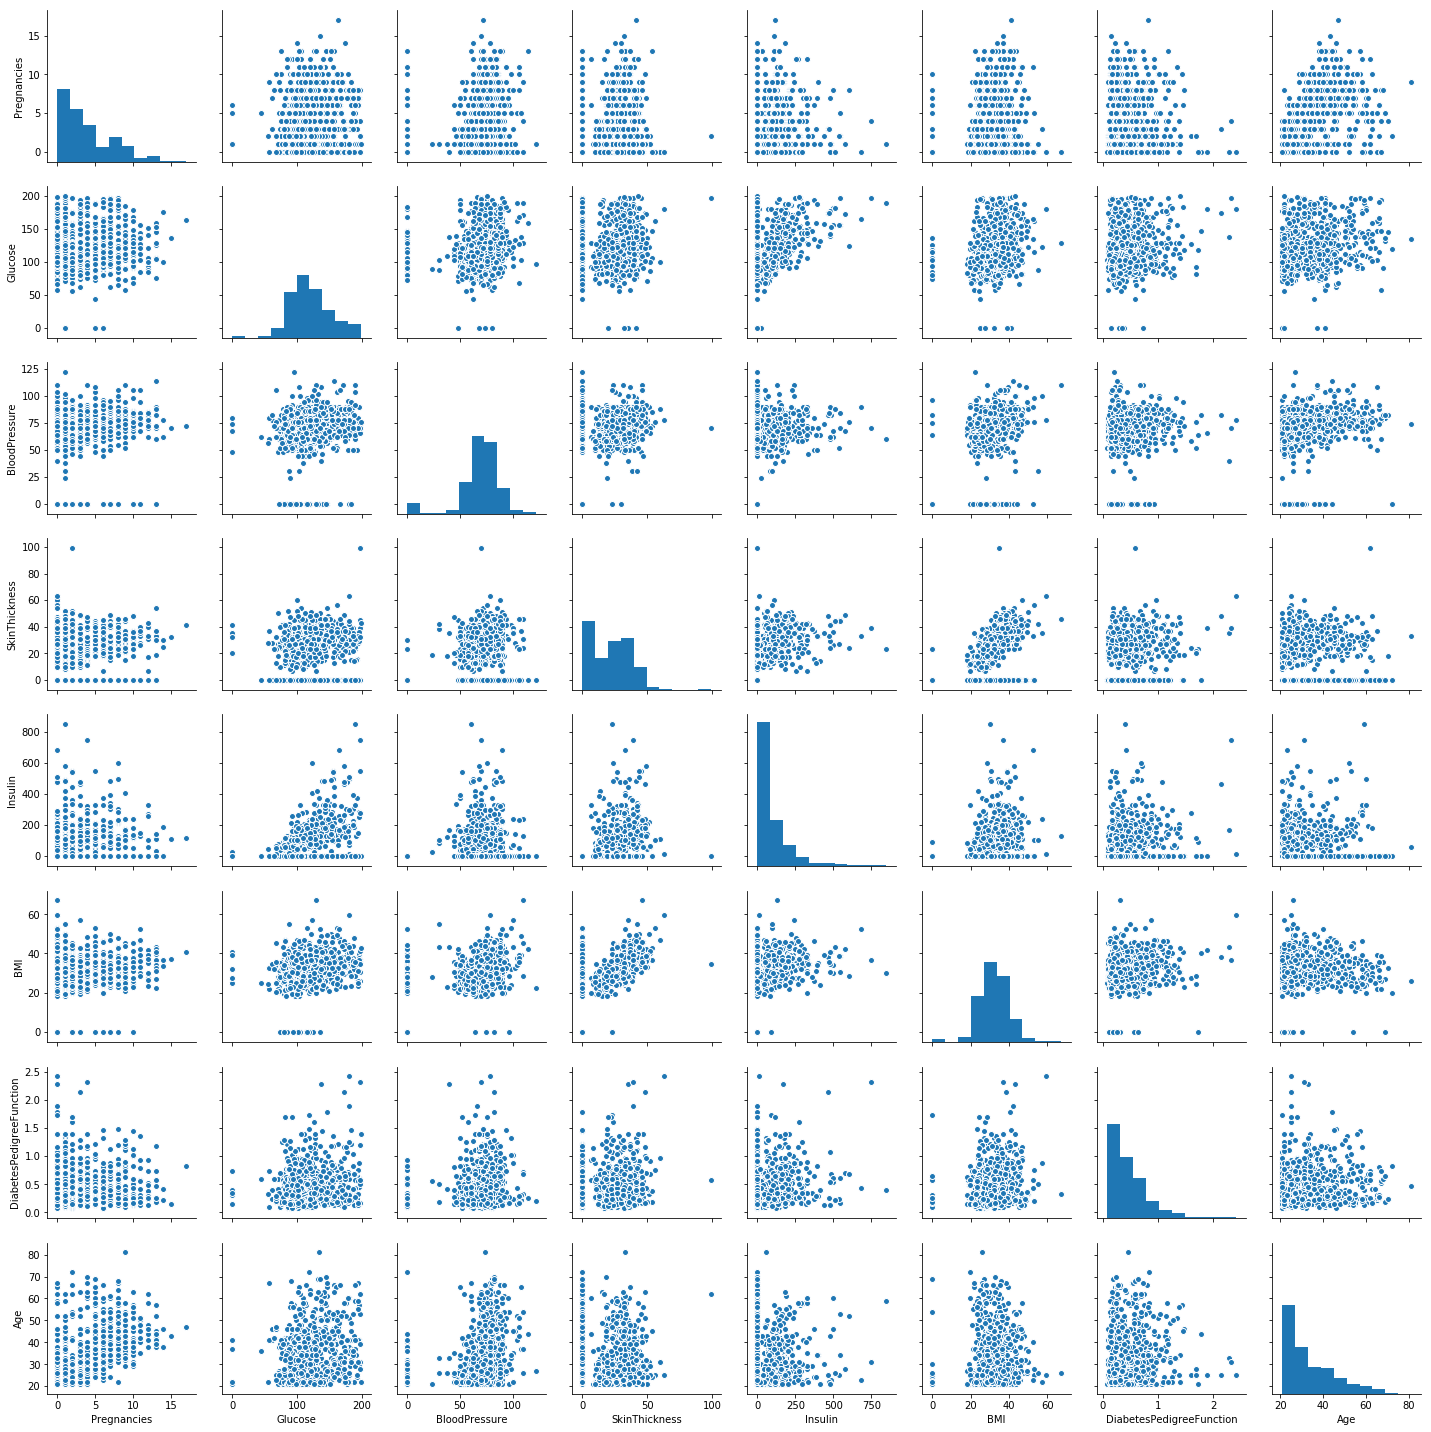

## Q5: Prepare X, y vectors and split them into training set and testing set. Use training percentage = 80%, and random seed = 101.

In [9]:
X = 
y = 

In [11]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
709,2,93,64,32,160,38.0,0.674,23
425,4,184,78,39,277,37.0,0.264,31
135,2,125,60,20,140,33.8,0.088,31
630,7,114,64,0,0,27.4,0.732,34
500,2,117,90,19,71,25.2,0.313,21


In [12]:
y_train.head()

709    1
425    1
135    0
630    1
500    0
Name: Outcome, dtype: int64

## Q6: Build a decision tree model with the default setting.

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = 


# Train Decision Tree Classifer
clf =


#Predict the response for test dataset
y_pred = 

In [14]:
y_test.head()

766    1
748    1
42     0
485    1
543    0
Name: Outcome, dtype: int64

In [15]:
y_pred[:5]

array([1, 1, 0, 0, 0])

## Q7: Evaluate the model with classification report.

             precision    recall  f1-score   support

          0       0.78      0.76      0.77       103
          1       0.54      0.57      0.55        51

avg / total       0.70      0.69      0.70       154



## Q8: Visualize decision trees

In [17]:
# conda install graphviz
import graphviz
from sklearn.tree import export_graphviz

# Supply your code here
dot_data = 



graph = graphviz.Source(dot_data) 
graph.render('DT_lec17_1') 

'DT_lec17_1.pdf'

## Q9: Optimize the decision tree model

#### There are three key parameters to tune on a decision tree model:

+ criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

+ splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

+ max_depth : int or None, optional (default=None): The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, you can also try other attribute selection measure such as entropy.

In [20]:
# Create Decision Tree classifer object with "entropy" and max depth being 3
clf2 = 

# Train Decision Tree Classifer
clf2 = 

#Predict the response for test dataset
y_pred2 = 

# Print the classification report



             precision    recall  f1-score   support

          0       0.77      0.91      0.84       103
          1       0.72      0.45      0.55        51

avg / total       0.75      0.76      0.74       154



## Visualize the new model again

In [19]:
# Supply your code here
dot_data =

graph = graphviz.Source(dot_data) 
graph.render('DT_lec17_2') 

'DT_lec17_2.pdf'

## Q10: Use Gaussian Naive Bayes model to repeat the classification ane evaluate the results.

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
# Create Gaussian Naive Bayes object
clf3 =

# Train the classifier
clf3 = 

#Predict the response for test dataset
y_pred3 = 

# Print the classification report



             precision    recall  f1-score   support

          0       0.82      0.81      0.81       103
          1       0.62      0.65      0.63        51

avg / total       0.76      0.75      0.75       154



## Show the probability of each y label class

array([0.6465798, 0.3534202])

## Further questions to ask:


#### When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:

+ They are extremely fast for both training and prediction
+ They provide straightforward probabilistic prediction
+ They are often very easily interpretable
+ They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

+ When the naive assumptions actually match the data (very rare in practice)
+ For very well-separated categories, when model complexity is less important
+ For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

## Great job!